In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv('Cleaned Salary Data.csv')
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,comp_txt,job_state,same_state,age,python,r,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\n,NM,0,51,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\n,MD,0,40,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\n,FL,1,14,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\n,WA,1,59,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\n,NY,1,26,1,0,0,0,1


In [34]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr.' in title.lower() or 'principal' in title.lower() or 'lead' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower() or 'junior' in title.lower():
        return 'jr'
    else:
        return 'na'
    

In [35]:
df['job_simp']= df['Job Title'].apply(title_simplifier)

In [36]:
df['job_simp'].value_counts()

job_simp
data scientist    279
na                184
data engineer     119
analyst           102
manager            22
mle                22
director           14
Name: count, dtype: int64

In [37]:
df['seniority']= df['Job Title'].apply(seniority)

In [38]:
df['seniority'].value_counts()

seniority
na        519
senior    220
jr          3
Name: count, dtype: int64

In [39]:
# Fixing state column(LA)

In [40]:
df['job_state']= df.job_state.apply(lambda x:x.strip() if x.strip().lower()!='los angeles' else 'CA')
df.job_state.value_counts()

job_state
CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
WI     10
UT     10
IN     10
AZ      9
MO      9
AL      8
GA      6
DE      6
KY      6
MI      6
CT      5
IA      5
LA      4
OR      4
NE      4
NM      3
KS      3
ID      2
MN      2
RI      1
SC      1
Name: count, dtype: int64

In [41]:
# job description length

In [42]:
df['des_length'] = df['Job Description'].apply(lambda x:len(x))
df['des_length'].head()

0    2536
1    4783
2    3461
3    3883
4    2728
Name: des_length, dtype: int64

In [43]:
# Competitors count

In [44]:
df['num_comp']= df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)
df['num_comp'].value_counts()

num_comp
0    460
3    228
2     41
1     12
4      1
Name: count, dtype: int64

In [45]:
df[df.hourly ==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
165,1,17,24
177,1,21,34
197,1,18,25
202,1,21,34
210,1,15,25
246,1,17,24
271,1,21,34
337,1,18,25
345,1,24,39
357,1,21,34


In [46]:
# Hourly wage to annual wage

df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis=1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis=1)

In [47]:
df[df.hourly ==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


In [48]:
# Removing new line character from the company text 

In [49]:
df['comp_txt'] = df['comp_txt'].apply(lambda x:x.replace('\n',''))


In [50]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python,r,spark,aws,excel,des_length,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,50.322102,0.528302,0.002695,0.225067,0.237197,0.522911,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,54.026459,0.499535,0.051882,0.417908,0.425651,0.499812,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,28.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,63.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,280.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


<Axes: >

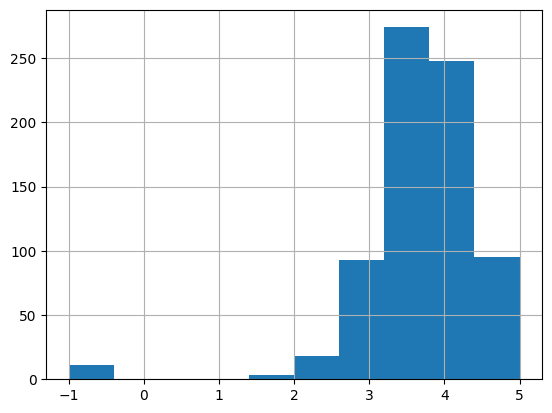

In [51]:
df.Rating.hist()

<Axes: >

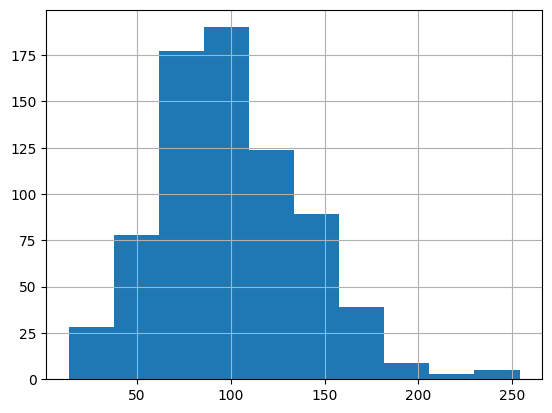

In [52]:
df.avg_salary.hist()

<Axes: >

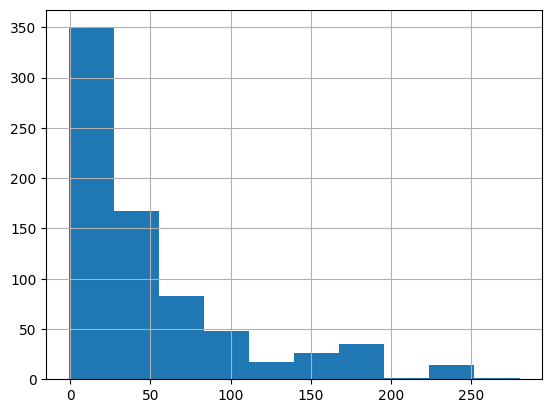

In [53]:
df.age.hist()

<Axes: >

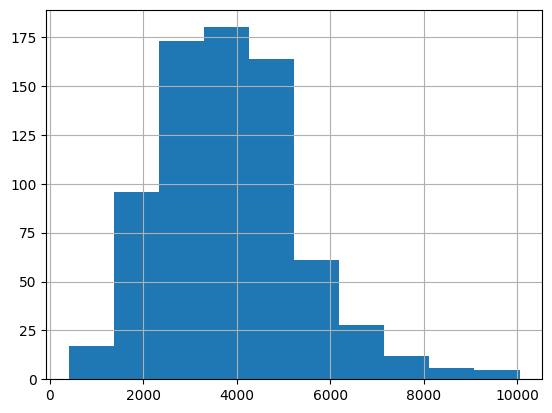

In [54]:
df.des_length.hist()

<Axes: >

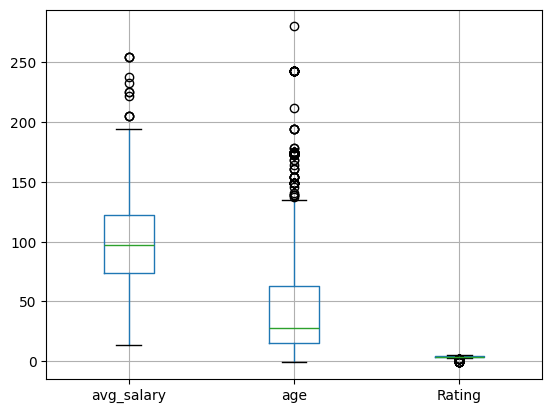

In [55]:
df.boxplot(column=['avg_salary','age','Rating'])

<Axes: >

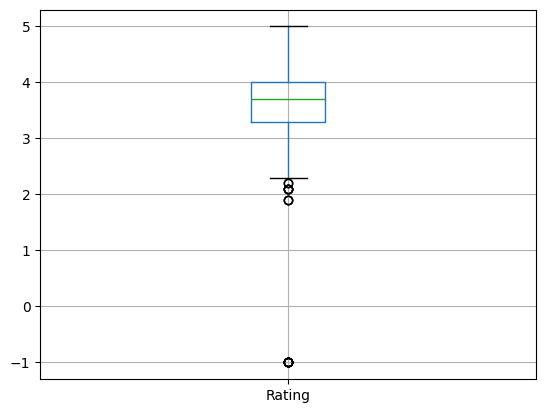

In [58]:
df.boxplot(column='Rating')

<Axes: >

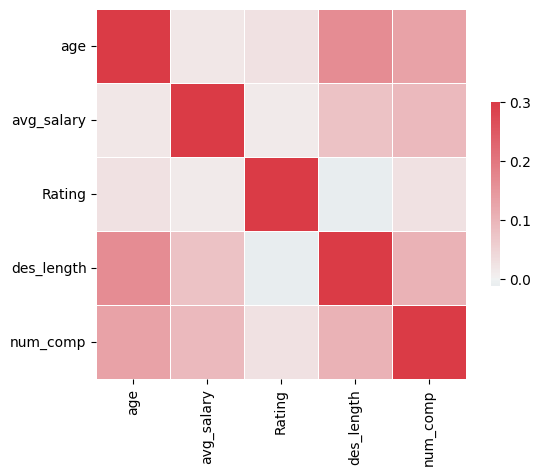

In [62]:

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','des_length','num_comp']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [63]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'comp_txt', 'job_state', 'same_state', 'age', 'python', 'r', 'spark',
       'aws', 'excel', 'job_simp', 'seniority', 'des_length', 'num_comp'],
      dtype='object')

In [64]:
df_categorical = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue','comp_txt', 'job_state', 'same_state','python', 'r', 'spark',
       'aws', 'excel', 'job_simp', 'seniority']]

graph for Location: total = 200


/var/folders/07/k6x5y6mn5rj52n50clkhlcv40000gn/T/ipykernel_49705/5591429.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.barplot(x=cat_num.index, y=cat_num,palette =palette )
/var/folders/07/k6x5y6mn5rj52n50clkhlcv40000gn/T/ipykernel_49705/5591429.py:5: UserWarning: 
The palette list has fewer values (20) than needed (200) and will cycle, which may produce an uninterpretable plot.
  chart = sns.barplot(x=cat_num.index, y=cat_num,palette =palette )
/var/folders/07/k6x5y6mn5rj52n50clkhlcv40000gn/T/ipykernel_49705/5591429.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


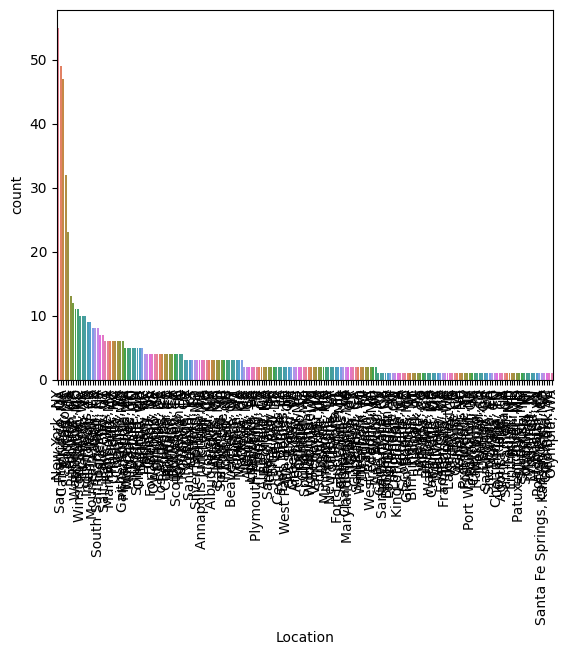

graph for Headquarters: total = 198


/var/folders/07/k6x5y6mn5rj52n50clkhlcv40000gn/T/ipykernel_49705/5591429.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.barplot(x=cat_num.index, y=cat_num,palette =palette )
/var/folders/07/k6x5y6mn5rj52n50clkhlcv40000gn/T/ipykernel_49705/5591429.py:5: UserWarning: 
The palette list has fewer values (20) than needed (198) and will cycle, which may produce an uninterpretable plot.
  chart = sns.barplot(x=cat_num.index, y=cat_num,palette =palette )
/var/folders/07/k6x5y6mn5rj52n50clkhlcv40000gn/T/ipykernel_49705/5591429.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


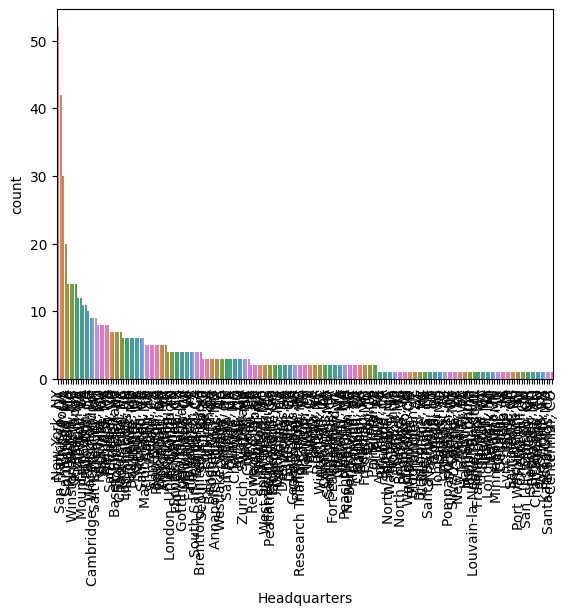

graph for Size: total = 9


/var/folders/07/k6x5y6mn5rj52n50clkhlcv40000gn/T/ipykernel_49705/5591429.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.barplot(x=cat_num.index, y=cat_num,palette =palette )
/var/folders/07/k6x5y6mn5rj52n50clkhlcv40000gn/T/ipykernel_49705/5591429.py:5: UserWarning: The palette list has more values (20) than needed (9), which may not be intended.
  chart = sns.barplot(x=cat_num.index, y=cat_num,palette =palette )
/var/folders/07/k6x5y6mn5rj52n50clkhlcv40000gn/T/ipykernel_49705/5591429.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


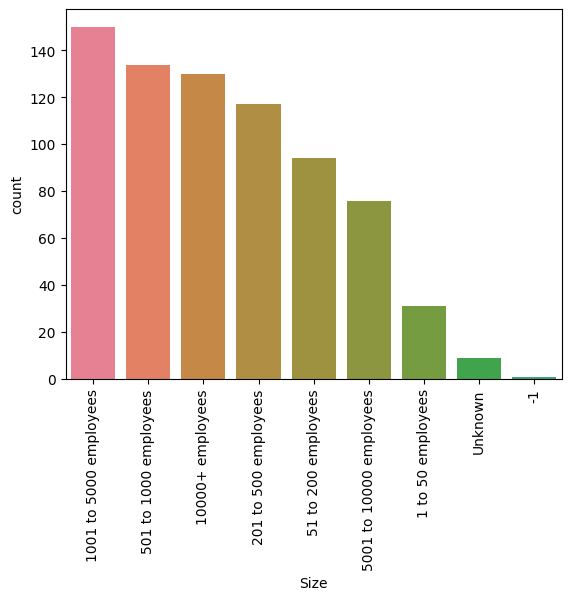

graph for Type of ownership: total = 11


/var/folders/07/k6x5y6mn5rj52n50clkhlcv40000gn/T/ipykernel_49705/5591429.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.barplot(x=cat_num.index, y=cat_num,palette =palette )
/var/folders/07/k6x5y6mn5rj52n50clkhlcv40000gn/T/ipykernel_49705/5591429.py:5: UserWarning: The palette list has more values (20) than needed (11), which may not be intended.
  chart = sns.barplot(x=cat_num.index, y=cat_num,palette =palette )
/var/folders/07/k6x5y6mn5rj52n50clkhlcv40000gn/T/ipykernel_49705/5591429.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


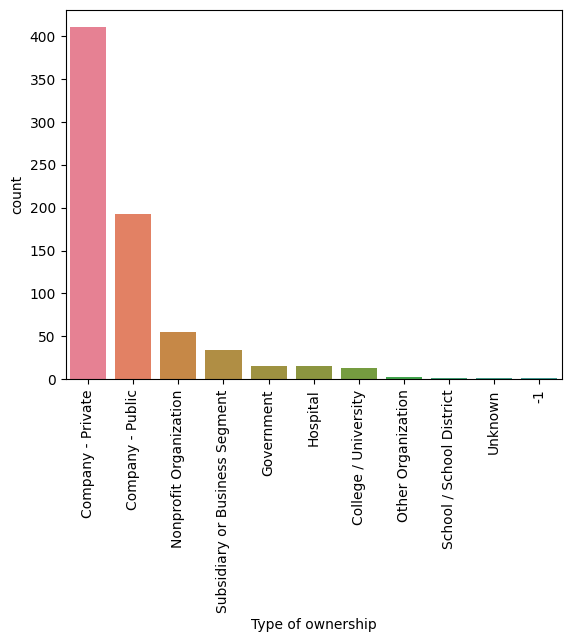

graph for Industry: total = 60


/var/folders/07/k6x5y6mn5rj52n50clkhlcv40000gn/T/ipykernel_49705/5591429.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.barplot(x=cat_num.index, y=cat_num,palette =palette )
/var/folders/07/k6x5y6mn5rj52n50clkhlcv40000gn/T/ipykernel_49705/5591429.py:5: UserWarning: 
The palette list has fewer values (20) than needed (60) and will cycle, which may produce an uninterpretable plot.
  chart = sns.barplot(x=cat_num.index, y=cat_num,palette =palette )
/var/folders/07/k6x5y6mn5rj52n50clkhlcv40000gn/T/ipykernel_49705/5591429.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


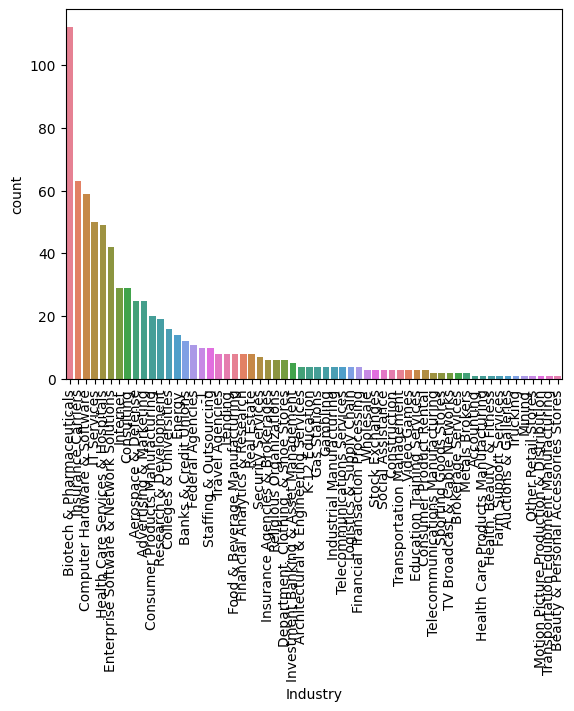

graph for Sector: total = 25


/var/folders/07/k6x5y6mn5rj52n50clkhlcv40000gn/T/ipykernel_49705/5591429.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.barplot(x=cat_num.index, y=cat_num,palette =palette )
/var/folders/07/k6x5y6mn5rj52n50clkhlcv40000gn/T/ipykernel_49705/5591429.py:5: UserWarning: 
The palette list has fewer values (20) than needed (25) and will cycle, which may produce an uninterpretable plot.
  chart = sns.barplot(x=cat_num.index, y=cat_num,palette =palette )
/var/folders/07/k6x5y6mn5rj52n50clkhlcv40000gn/T/ipykernel_49705/5591429.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


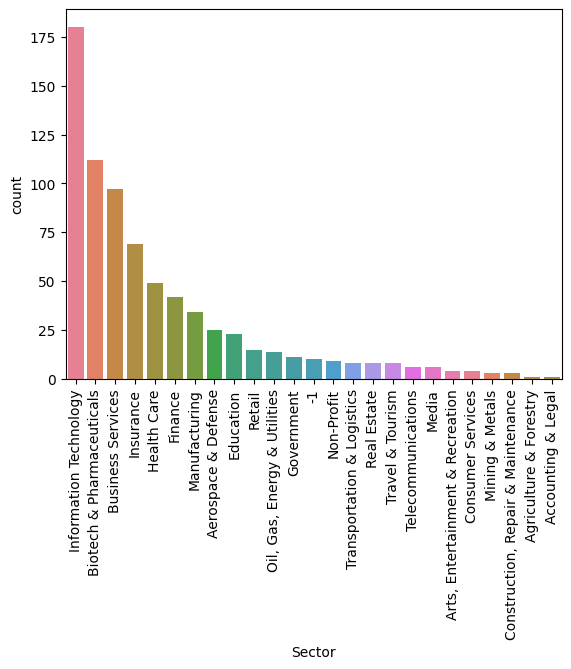

graph for Revenue: total = 14


/var/folders/07/k6x5y6mn5rj52n50clkhlcv40000gn/T/ipykernel_49705/5591429.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.barplot(x=cat_num.index, y=cat_num,palette =palette )
/var/folders/07/k6x5y6mn5rj52n50clkhlcv40000gn/T/ipykernel_49705/5591429.py:5: UserWarning: The palette list has more values (20) than needed (14), which may not be intended.
  chart = sns.barplot(x=cat_num.index, y=cat_num,palette =palette )
/var/folders/07/k6x5y6mn5rj52n50clkhlcv40000gn/T/ipykernel_49705/5591429.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


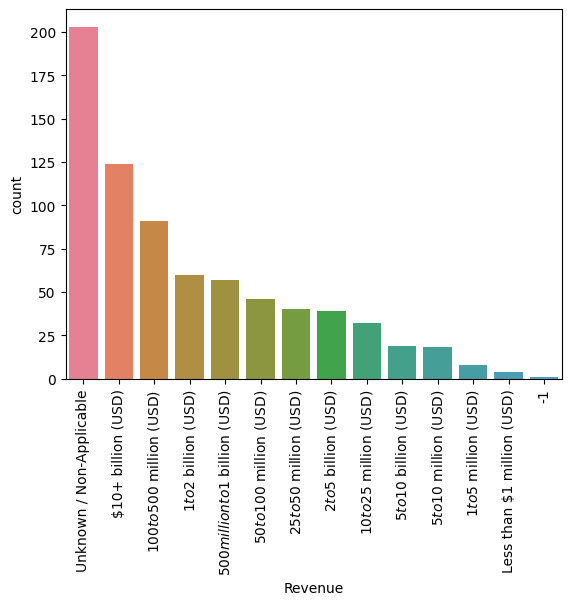

graph for comp_txt: total = 343


/var/folders/07/k6x5y6mn5rj52n50clkhlcv40000gn/T/ipykernel_49705/5591429.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.barplot(x=cat_num.index, y=cat_num,palette =palette )
/var/folders/07/k6x5y6mn5rj52n50clkhlcv40000gn/T/ipykernel_49705/5591429.py:5: UserWarning: 
The palette list has fewer values (20) than needed (343) and will cycle, which may produce an uninterpretable plot.
  chart = sns.barplot(x=cat_num.index, y=cat_num,palette =palette )
/var/folders/07/k6x5y6mn5rj52n50clkhlcv40000gn/T/ipykernel_49705/5591429.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


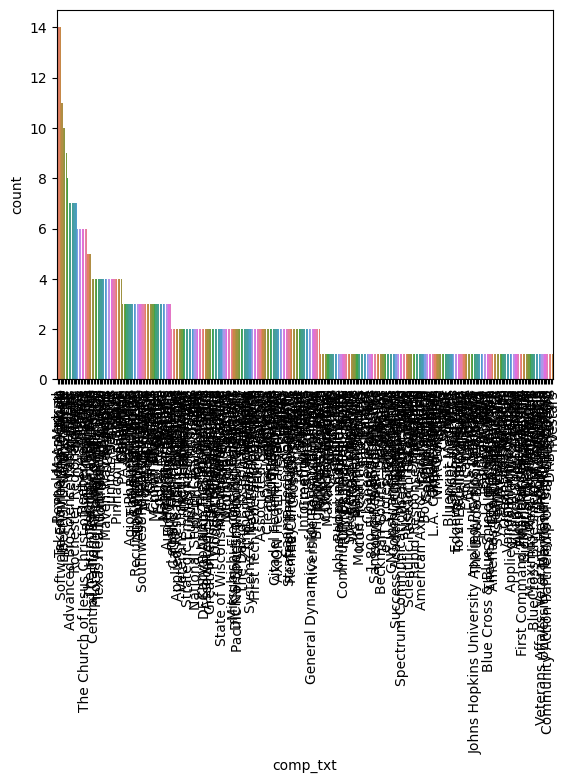

graph for job_state: total = 37


/var/folders/07/k6x5y6mn5rj52n50clkhlcv40000gn/T/ipykernel_49705/5591429.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.barplot(x=cat_num.index, y=cat_num,palette =palette )
/var/folders/07/k6x5y6mn5rj52n50clkhlcv40000gn/T/ipykernel_49705/5591429.py:5: UserWarning: 
The palette list has fewer values (20) than needed (37) and will cycle, which may produce an uninterpretable plot.
  chart = sns.barplot(x=cat_num.index, y=cat_num,palette =palette )
/var/folders/07/k6x5y6mn5rj52n50clkhlcv40000gn/T/ipykernel_49705/5591429.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


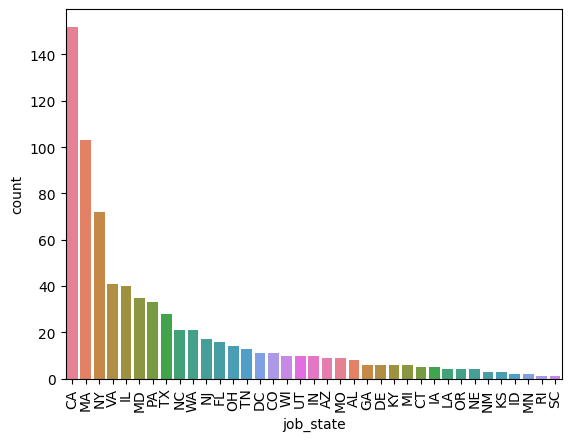

graph for same_state: total = 2


/var/folders/07/k6x5y6mn5rj52n50clkhlcv40000gn/T/ipykernel_49705/5591429.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.barplot(x=cat_num.index, y=cat_num,palette =palette )
/var/folders/07/k6x5y6mn5rj52n50clkhlcv40000gn/T/ipykernel_49705/5591429.py:5: UserWarning: The palette list has more values (20) than needed (2), which may not be intended.
  chart = sns.barplot(x=cat_num.index, y=cat_num,palette =palette )
/var/folders/07/k6x5y6mn5rj52n50clkhlcv40000gn/T/ipykernel_49705/5591429.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


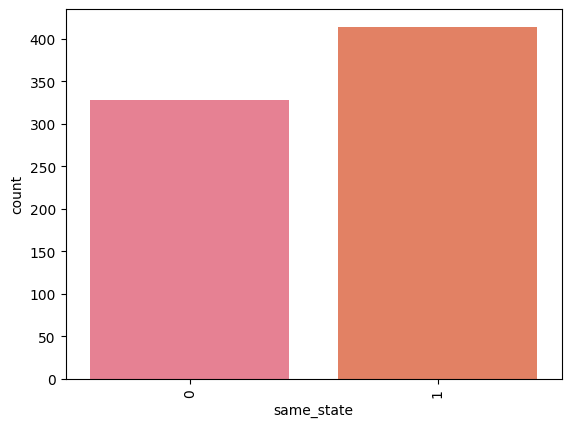

graph for python: total = 2


/var/folders/07/k6x5y6mn5rj52n50clkhlcv40000gn/T/ipykernel_49705/5591429.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.barplot(x=cat_num.index, y=cat_num,palette =palette )
/var/folders/07/k6x5y6mn5rj52n50clkhlcv40000gn/T/ipykernel_49705/5591429.py:5: UserWarning: The palette list has more values (20) than needed (2), which may not be intended.
  chart = sns.barplot(x=cat_num.index, y=cat_num,palette =palette )
/var/folders/07/k6x5y6mn5rj52n50clkhlcv40000gn/T/ipykernel_49705/5591429.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


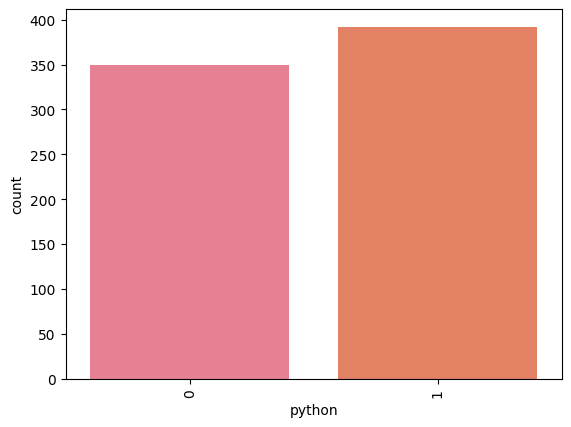

graph for r: total = 2


/var/folders/07/k6x5y6mn5rj52n50clkhlcv40000gn/T/ipykernel_49705/5591429.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.barplot(x=cat_num.index, y=cat_num,palette =palette )
/var/folders/07/k6x5y6mn5rj52n50clkhlcv40000gn/T/ipykernel_49705/5591429.py:5: UserWarning: The palette list has more values (20) than needed (2), which may not be intended.
  chart = sns.barplot(x=cat_num.index, y=cat_num,palette =palette )
/var/folders/07/k6x5y6mn5rj52n50clkhlcv40000gn/T/ipykernel_49705/5591429.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


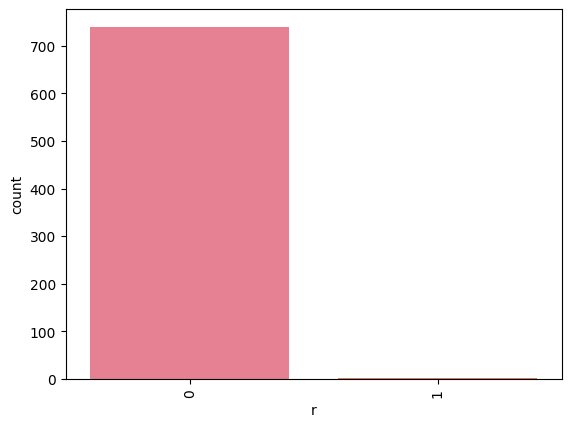

graph for spark: total = 2


/var/folders/07/k6x5y6mn5rj52n50clkhlcv40000gn/T/ipykernel_49705/5591429.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.barplot(x=cat_num.index, y=cat_num,palette =palette )
/var/folders/07/k6x5y6mn5rj52n50clkhlcv40000gn/T/ipykernel_49705/5591429.py:5: UserWarning: The palette list has more values (20) than needed (2), which may not be intended.
  chart = sns.barplot(x=cat_num.index, y=cat_num,palette =palette )
/var/folders/07/k6x5y6mn5rj52n50clkhlcv40000gn/T/ipykernel_49705/5591429.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


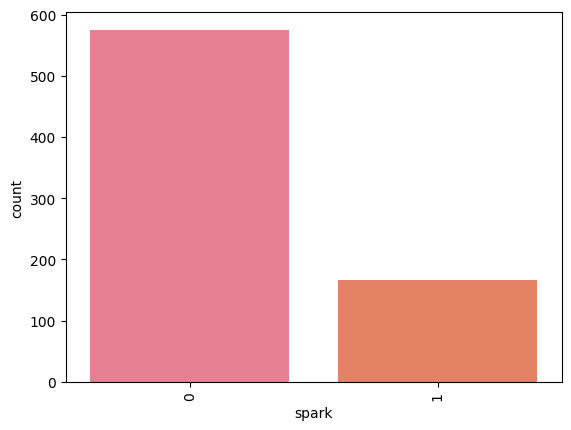

/var/folders/07/k6x5y6mn5rj52n50clkhlcv40000gn/T/ipykernel_49705/5591429.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.barplot(x=cat_num.index, y=cat_num,palette =palette )
/var/folders/07/k6x5y6mn5rj52n50clkhlcv40000gn/T/ipykernel_49705/5591429.py:5: UserWarning: The palette list has more values (20) than needed (2), which may not be intended.
  chart = sns.barplot(x=cat_num.index, y=cat_num,palette =palette )
/var/folders/07/k6x5y6mn5rj52n50clkhlcv40000gn/T/ipykernel_49705/5591429.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


graph for aws: total = 2


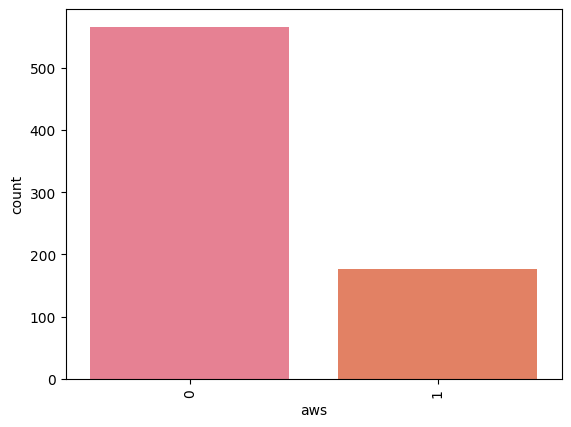

graph for excel: total = 2


/var/folders/07/k6x5y6mn5rj52n50clkhlcv40000gn/T/ipykernel_49705/5591429.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.barplot(x=cat_num.index, y=cat_num,palette =palette )
/var/folders/07/k6x5y6mn5rj52n50clkhlcv40000gn/T/ipykernel_49705/5591429.py:5: UserWarning: The palette list has more values (20) than needed (2), which may not be intended.
  chart = sns.barplot(x=cat_num.index, y=cat_num,palette =palette )
/var/folders/07/k6x5y6mn5rj52n50clkhlcv40000gn/T/ipykernel_49705/5591429.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


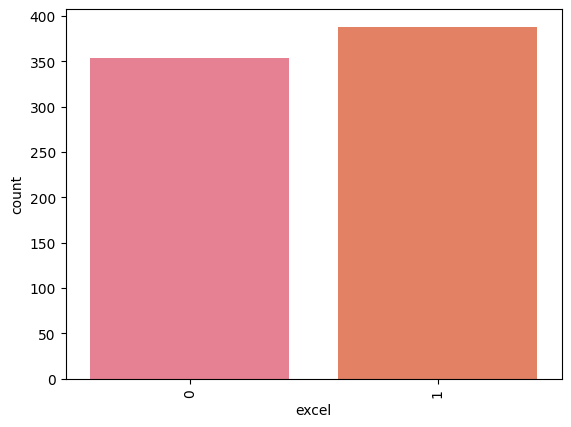

graph for job_simp: total = 7


/var/folders/07/k6x5y6mn5rj52n50clkhlcv40000gn/T/ipykernel_49705/5591429.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.barplot(x=cat_num.index, y=cat_num,palette =palette )
/var/folders/07/k6x5y6mn5rj52n50clkhlcv40000gn/T/ipykernel_49705/5591429.py:5: UserWarning: The palette list has more values (20) than needed (7), which may not be intended.
  chart = sns.barplot(x=cat_num.index, y=cat_num,palette =palette )
/var/folders/07/k6x5y6mn5rj52n50clkhlcv40000gn/T/ipykernel_49705/5591429.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


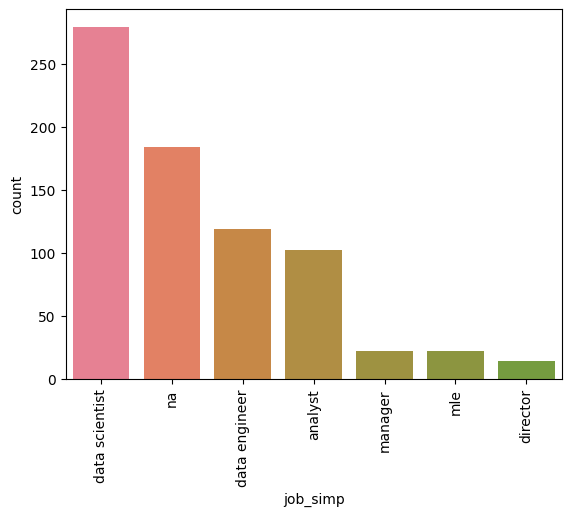

graph for seniority: total = 3


/var/folders/07/k6x5y6mn5rj52n50clkhlcv40000gn/T/ipykernel_49705/5591429.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.barplot(x=cat_num.index, y=cat_num,palette =palette )
/var/folders/07/k6x5y6mn5rj52n50clkhlcv40000gn/T/ipykernel_49705/5591429.py:5: UserWarning: The palette list has more values (20) than needed (3), which may not be intended.
  chart = sns.barplot(x=cat_num.index, y=cat_num,palette =palette )
/var/folders/07/k6x5y6mn5rj52n50clkhlcv40000gn/T/ipykernel_49705/5591429.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


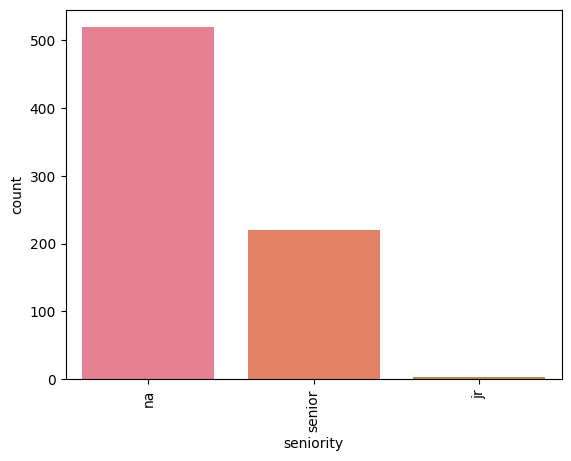

In [70]:
for i in df_categorical.columns:
    palette = sns.color_palette("husl", 20) 
    cat_num = df_categorical[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num,palette =palette )
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


/var/folders/07/k6x5y6mn5rj52n50clkhlcv40000gn/T/ipykernel_49705/1659500352.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.barplot(x=cat_num.index, y=cat_num,palette=palette)
/var/folders/07/k6x5y6mn5rj52n50clkhlcv40000gn/T/ipykernel_49705/1659500352.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


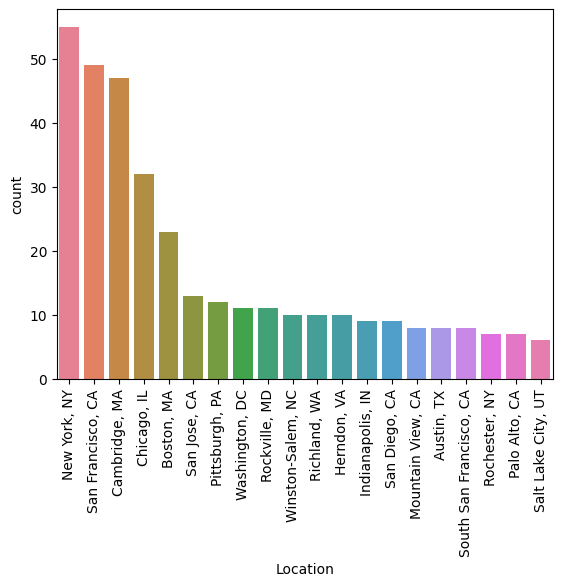

graph for Headquarters: total = 20


/var/folders/07/k6x5y6mn5rj52n50clkhlcv40000gn/T/ipykernel_49705/1659500352.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.barplot(x=cat_num.index, y=cat_num,palette=palette)
/var/folders/07/k6x5y6mn5rj52n50clkhlcv40000gn/T/ipykernel_49705/1659500352.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


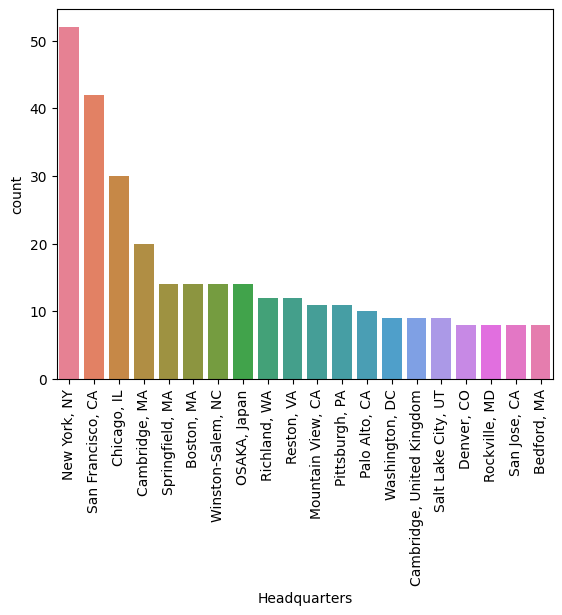

graph for comp_txt: total = 20


/var/folders/07/k6x5y6mn5rj52n50clkhlcv40000gn/T/ipykernel_49705/1659500352.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.barplot(x=cat_num.index, y=cat_num,palette=palette)
/var/folders/07/k6x5y6mn5rj52n50clkhlcv40000gn/T/ipykernel_49705/1659500352.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


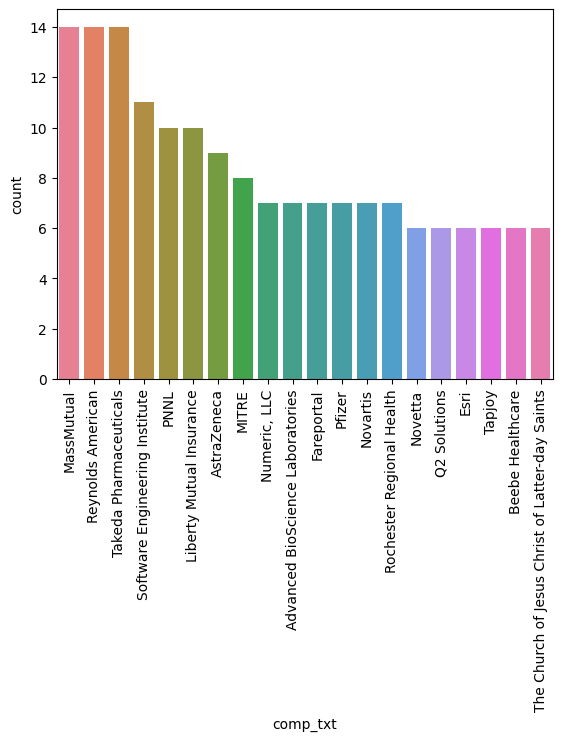

In [69]:
for i in df_categorical[['Location','Headquarters','comp_txt']].columns:
    palette = sns.color_palette("husl", 20) 
    cat_num = df_categorical[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num,palette=palette)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [71]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'comp_txt', 'job_state', 'same_state', 'age', 'python', 'r', 'spark',
       'aws', 'excel', 'job_simp', 'seniority', 'des_length', 'num_comp'],
      dtype='object')

In [73]:
pd.pivot_table(df,index='job_simp',values='avg_salary')

,avg_salary
job_simp,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818
na,84.853261


In [85]:
#df[df['job_simp']=='manager'][['avg_salary','Job Title','job_state','Job Description']]


,avg_salary,Job Title,job_state,Job Description
127,40.5,Data Analytics Manager,MO,About You:\nWe are looking for a dedicated and...
153,109.5,BI & Platform Analytics Manager,NJ,A collective energy and ambition. A place wher...
169,87.5,Analytics Manager,MI,Responsible for both high level and granular m...
200,64.0,Analytics Manager - Data Mart,CA,We have an opportunity to join the Alliance as...
213,109.5,BI & Platform Analytics Manager,NJ,A collective energy and ambition. A place wher...
253,87.5,Analytics Manager,MI,Responsible for both high level and granular m...
332,63.0,Data Analytics Project Manager,MA,"Who We Are At MassMutual, we help millions of ..."
346,64.0,Analytics Manager - Data Mart,CA,We have an opportunity to join the Alliance as...
366,61.5,Revenue Analytics Manager,CA,HOVER uses patented technology making it possi...
480,63.0,Data Analytics Project Manager,MA,"Who We Are At MassMutual, we help millions of ..."


In [88]:
pd.pivot_table(df,index='job_state',values='avg_salary').sort_values('avg_salary',ascending=False)

,avg_salary
job_state,
CA,123.513158
IL,116.662500
DC,110.181818
MA,106.281553
NJ,104.558824
MI,100.250000
RI,100.000000
NY,98.652778
NC,98.452381


In [89]:
pd.set_option('display.max_rows',None)

In [90]:
pd.pivot_table(df,index=['job_state','job_simp'],values='avg_salary').sort_values('job_state',ascending=False)

avg_salary
job_state job_simp                  
WI        na               54.000000
          data scientist  113.500000
          analyst          58.833333
WA        na               97.500000
          data scientist   99.764706
          analyst          54.500000
VA        na               79.300000
          mle              87.000000
          data scientist  108.416667
          data engineer    96.900000
          analyst          71.583333
UT        data engineer   100.333333
          analyst          54.750000
          data scientist  140.500000
TX        na               41.285714
          data scientist  100.730769
          data engineer   113.062500
TN        data scientist   96.000000
          data engineer   100.950000
          analyst          13.500000
SC        na               60.500000
RI        analyst         100.000000
PA        manager         109.666667
          data engineer    91.500000
          data scientist  113.333333
          analyst          62.750000
          mle             120.500000
          na               76.062500
OR        data scientist   98.500000
          data engineer    73.000000
OH        na               91.166667
          data scientist  105.285714
          analyst          53.875000
NY        na               81.583333
          mle             125.000000
          data scientist  115.250000
          data engineer    86.375000
          analyst          65.607143
NM        data scientist   74.333333
NJ        data scientist  106.875000
          analyst          83.583333
          data engineer   112.000000
          manager         109.500000
          director        161.500000
          na               82.500000
NE        na               41.000000
NC        na               90.916667
          data scientist  117.000000
          data engineer   104.250000
MO        na               72.333333
          manager          40.500000
          data scientist  127.666667
          analyst          61.000000
MN        data engineer    95.000000
          analyst          76.000000
MI        manager          87.500000
          data scientist  106.625000
MD        na               88.750000
          data scientist  109.115385
          data engineer   109.000000
          analyst          80.666667
MA        na              107.478261
          manager          71.900000
          director        117.833333
          data scientist  113.750000
          data engineer   107.291667
          analyst          59.125000
LA        analyst          48.000000
          data engineer    70.500000
          na               20.000000
KY        na              103.500000
          data scientist   84.000000
KS        mle              87.000000
IN        na               69.000000
          data scientist   84.500000
          data engineer   114.500000
IL        analyst          66.500000
          na               57.166667
          mle             133.000000
          director        221.750000
          data scientist  117.233333
          data engineer    96.125000
ID        analyst          56.250000
IA        analyst          43.000000
          data engineer   102.833333
GA        data scientist   81.333333
          na               80.000000
FL        data scientist   97.357143
          data engineer    91.833333
          analyst          47.500000
DE        na               27.500000
DC        data scientist  149.000000
          data engineer    85.000000
          analyst          63.500000
CT        na               62.500000
          data scientist   84.000000
CO        mle             100.500000
          data engineer    99.000000
          analyst          29.500000
          na               31.500000
          data scientist  108.666667
CA        na               99.907407
          mle             177.300000
          manager          80.611111
          data scientist  142.522059
          data engineer   129.540000
          analyst          85.

In [91]:
pd.pivot_table(df[df.job_simp=='data scientist'],index='job_state',values='avg_salary').sort_values('avg_salary',ascending=False)

,avg_salary
job_state,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [92]:
# Salary X rating 


In [93]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'comp_txt', 'job_state', 'same_state', 'age', 'python', 'r', 'spark',
       'aws', 'excel', 'job_simp', 'seniority', 'des_length', 'num_comp'],
      dtype='object')

In [103]:
pd.set_option('display.max_rows',None)

In [104]:
df_pivot = df[['Rating','Industry','Sector','Revenue','Competitors','hourly','employer_provided','avg_salary','age','python','r','spark','aws','excel','num_comp']]

In [106]:
pd.pivot_table(df_pivot, index='Revenue',columns='python',values = 'avg_salary',aggfunc='count')

python,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


In [114]:
from wordcloud import WordCloud, STOPWORDS


In [112]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


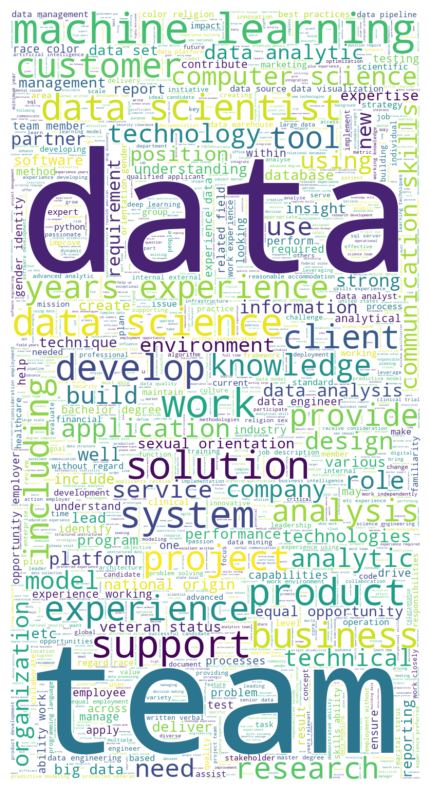

In [116]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()